In [12]:
import pandas as pd
import numpy as np
import random

df = pd.read_csv("/content/GSPC_2011.csv")

class QLearningAgent:
    def __init__(self, n_days, learning_rate=0.1, discount_factor=0.9, epsilon=1.0, epsilon_decay=0.995, min_epsilon=0.01):
        self.n_days = n_days
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.q_table = {}

    def get_state(self, prices):
        return tuple([(p,) for p in prices])

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon: # exploration
            return random.choice(["buy", "sell", "hold"])
        else:
            if state not in self.q_table:
                self.q_table[state] = {"buy": 0, "sell": 0, "hold": 0}
            return max(self.q_table[state], key=self.q_table[state].get)

    def update_q_value(self, state, action, reward, next_state):
        if state not in self.q_table:
            self.q_table[state] = {"buy": 0, "sell": 0, "hold": 0}
        if next_state not in self.q_table:
            self.q_table[next_state] = {"buy": 0, "sell": 0, "hold": 0}

        old_value = self.q_table[state][action]
        next_max = max(self.q_table[next_state].values())

        new_value = (1 - self.learning_rate) * old_value + self.learning_rate * (reward + self.discount_factor * next_max)
        self.q_table[state][action] = new_value

    def decay_epsilon(self):
        self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)


def simulate_trading(data, agent, episodes=100):
    profit_history = []
    for episode in range(episodes):
        print(f"Episode {episode + 1}/{episodes}")

        total_profit = 0
        holding_stock = False
        buy_price = 0

        for i in range(agent.n_days, len(data) - 1):
            state = agent.get_state(data[i - agent.n_days:i])
            action = agent.choose_action(state)

            if action == "buy" and not holding_stock:
                holding_stock = True
                buy_price = data[i]
                reward = 0

            elif action == "sell" and holding_stock:
                holding_stock = False
                profit = data[i] - buy_price
                total_profit += profit
                reward = profit

            elif action == "hold":
                reward = 0
            else:
                reward = -10

            # Update Q-values
            next_state = agent.get_state(data[i - agent.n_days + 1:i + 1])
            agent.update_q_value(state, action, reward, next_state)

        profit_history.append(total_profit)
        agent.decay_epsilon()
        print(f"Total profit: {total_profit}")
        print("-" * 30)

    return profit_history


def print_q_table(agent):
    rows = []
    for state, actions in agent.q_table.items():
        state_str = ', '.join([str(s[0]) for s in state])
        rows.append({"State": state_str, **actions})

    q_table_df = pd.DataFrame(rows)
    print(q_table_df)

if __name__ == "__main__":
    closing_prices = df['Close'].values

    n_days = 5
    agent = QLearningAgent(n_days=n_days)

    profit_history = simulate_trading(closing_prices, agent, episodes=200)
    print_q_table(agent)


Episode 1/200
Total profit: -53.490111999999954
------------------------------
Episode 2/200
Total profit: -10.030275999999503
------------------------------
Episode 3/200
Total profit: -139.22034099999928
------------------------------
Episode 4/200
Total profit: -111.51000900000008
------------------------------
Episode 5/200
Total profit: -234.16052199999967
------------------------------
Episode 6/200
Total profit: -161.09985599999982
------------------------------
Episode 7/200
Total profit: 126.48022899999933
------------------------------
Episode 8/200
Total profit: 117.93957200000068
------------------------------
Episode 9/200
Total profit: -406.8802489999998
------------------------------
Episode 10/200
Total profit: -136.97997900000018
------------------------------
Episode 11/200
Total profit: -146.74011199999995
------------------------------
Episode 12/200
Total profit: 25.679810999999972
------------------------------
Episode 13/200
Total profit: 112.91064699999924
-----

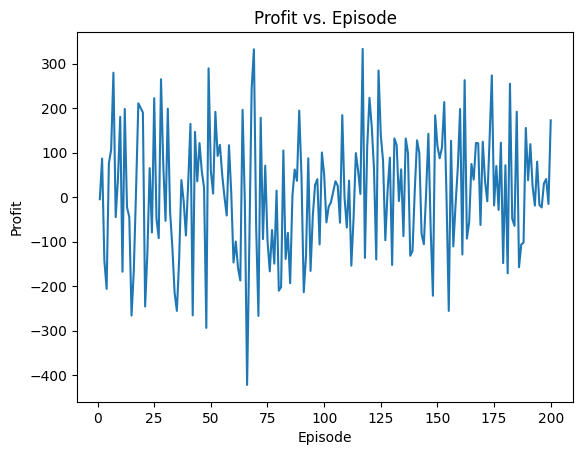

In [8]:
import  matplotlib.pyplot as plt
plt.plot(range(1, len(profit_history) + 1), profit_history)
plt.xlabel("Episode")
plt.ylabel("Profit")
plt.title("Profit vs. Episode")
plt.show()